# CS/ECE/ISyE 524 - Spr 2018 - HW 3 - Solutions
### Prepared by: Laurent Lessard

## 1. Doodle Scheduling

Doodle is looking to interview a candidate for a new software engineer
position at their company. It works like this: the interview (10 AM to 3 PM) is divided into a number
of 20-minute time slots that may be used for 1-on-1 meetings with the candidate. There is also a
one-hour time slot in the middle of the day where 3 employees take the candidate out for lunch.
It would be nice for all 15 senior employees to have a chance to meet with the candidate at some point
during the day, but everybody has a busy schedule so it's not clear whether this will be possible. As an
obvious first step, a doodle poll was sent out to the 15 senior employees to figure out their availability.
The data collected is shown in the table below.

|       |10:00|10:20|10:40|11:00|11:20|11:40|Lunch|1:00|1:20|1:40|2:00|2:20|2:40|
|-------|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:--:|:--:|:--:|:--:|:--:|:--:|
|Manuel |0|0|1|1|0|0|0|1|1|0|0|0|0|
|Luca   |0|1|1|0|0|0|0|0|1|1|0|0|0|
|Jule   |0|0|0|1|1|0|1|1|0|1|1|1|1|
|Michael|0|0|0|1|1|1|1|1|1|1|1|1|0|
|Malte  |0|0|0|0|0|0|1|1|1|0|0|0|0|
|Chris  |0|1|1|0|0|0|0|0|1|1|0|0|0|
|Spyros |0|0|0|1|1|1|1|0|0|0|0|0|0|
|Mirjam |1|1|0|0|0|0|0|0|0|0|1|1|1|
|Matt   |1|1|1|0|0|0|0|0|0|1|1|0|0|
|Florian|0|0|0|0|0|0|0|1|1|0|0|0|0|
|Josep  |0|0|0|0|0|0|1|1|1|0|0|0|0|
|Joel   |1|1|0|0|0|1|1|1|1|0|0|1|1|
|Tom    |1|1|1|0|1|1|0|0|0|0|0|1|1|
|Daniel |0|1|1|1|0|0|0|0|0|0|0|0|0|
|Anne   |1|1|0|0|1|1|0|0|0|0|0|0|0|

In the table, a 1 means that the employee is available at the indicated time, while a 0 means that they
are unavailable. Determine whether a feasible interview schedule exists. If so, print out a calendar for
candidate that lists who they will be meeting at each time slot.

**Solution**: You can think of this as an assignment problem where we are assigning people to timeslots. The only twist is that three people must be assigned to lunch. This is dealt with by changing the constraint associated with the lunch slot. As in all network flow problems, our decision variables are the edges of the graph. Specifically, we use a variable $x_{ij} \in \{0,1\}$ that indicates whether or not person $i$ meets with the candidate at time $j$. NOTE: there is no objective here; we are simply seeking a feasible solution. In fact, there are many different feasible solutions to this problem!

In [7]:
using JuMP, Clp, NamedArrays

availability =
  [ 0 0 1 1 0 0 0 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 0 1 1 0 1 1 1 1
    0 0 0 1 1 1 1 1 1 1 1 1 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 1 1 0 0 0 0 0 0
    1 1 0 0 0 0 0 0 0 0 1 1 1
    1 1 1 0 0 0 0 0 0 1 1 0 0
    0 0 0 0 0 0 0 1 1 0 0 0 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    1 1 0 0 0 1 1 1 1 0 0 1 1
    1 1 1 0 1 1 0 0 0 0 0 1 1
    0 1 1 1 0 0 0 0 0 0 0 0 0
    1 1 0 0 1 1 0 0 0 0 0 0 0 ]

TIME = collect(1:13)   # numbered time slots (lunch is slot number 7)
TIMESTR = ["10:00","10:20","10:40","11:00","11:20","11:40","lunch","1:00","1:20","1:40","2:00","2:20","2:40"]
NAME = [ :Manuel, :Luca, :Jule, :Michael, :Malte, :Chris, :Spyros, :Mirjam, :Matt, :Florian, :Josep, :Joel, :Tom, :Daniel, :Anne ]
times = NamedArray( availability, (NAME,TIME), ("NAME","TIME"))

m = Model(solver=ClpSolver())

@variable(m, x[NAME,TIME] >= 0)
@constraint(m, flow1[j in [1:6; 8:13]], sum(x[i,j]*times[i,j] for i in NAME) <= 1  )   # all time slots except lunch
@constraint(m, sum(x[i,7]*times[i,7] for i in NAME) == 3  )                            # lunch time needs 3 people
@constraint(m, flow2[i in NAME], sum(x[i,j]*times[i,j] for j in TIME) == 1 )           # every employee has one meeting
@objective(m, Min, sum(x[i,j] for i in NAME, j in TIME) )

solve(m)

assignment = [ Int(getvalue(x[i,j])) for i in NAME, j in TIME ]
                                                
println("INTERVIEW SCHEDULE:")
for (i,t) in enumerate(TIMESTR)
    print(t, " -- meet with ")
    for j = find(assignment[:,i])
        print(NAME[j]," ")
    end
    println()
end

INTERVIEW SCHEDULE:
10:00 -- meet with Matt 
10:20 -- meet with Chris 
10:40 -- meet with Daniel 
11:00 -- meet with Manuel 
11:20 -- meet with Tom 
11:40 -- meet with Anne 
lunch -- meet with Spyros Josep Joel 
1:00 -- meet with Malte 
1:20 -- meet with Florian 
1:40 -- meet with Luca 
2:00 -- meet with Mirjam 
2:20 -- meet with Michael 
2:40 -- meet with Jule 


## 2. Car rental

A small car rental company has a fleet of 94 vehicles distributed among its 10 agencies. The location of every agency is given by its geographical coordinates x and y in a grid based on miles. We assume that the road distance between agencies is approximately 1.3 times the Euclidean distance (as the crow flies). The following table indicates the coordinates of all agencies, the number of cars required the next morning, and the stock of cars in the evening preceding this day.

|Agency number |1 |2 |3 |4 |5 |6 |7 |8 |9 |10|
|--------------|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|x coordinate  |0 |20 |18 |30 |35 |33 |5 |5 |11 |2|
|y coordinate  |0 |20 |10 |12 |0 |25 |27 |10 |0 |15|
|Required cars |10 |6 |8 |11 |9 |7 |15 |7 |9 |12|
|Cars present  |8 |13 |4 |8 |12 |2 |14 |11 |15 |7|

Supposing the cost for transporting a car is \$0.50 per mile, determine the movements of cars that allow
the company to re-establish the required numbers of cars at all agencies, minimizing the total cost
incurred for transport.

**Solution:** This is a standard transportation problem, except that we are allowed to keep cars where they are. This amounts to adding edges of distance zero from each agency to itself! Note that since the supply/demand for each node is an integer and the edge capacities are unconstrained, this problem will have integer solutions. So we can solve it as an ordinary LP.

In [19]:
using JuMP, Clp

position = [0 0; 20 20; 18 10; 30 12; 35 0; 33 25; 5 27; 5 10; 11 0; 2 15]
present = [8; 13; 4; 8; 12; 2; 14; 11; 15; 7]
required = [10; 6; 8; 11; 9; 7; 15; 7; 9; 12]
dist = zeros(10,10)

# form the array of distances dist[i,j] which is the distance from agency i to agency j.
for i = 1 : 10
    for j = 1 : 10
        dist[i,j] = 1.3 * norm(position[i,:]-position[j,:])
    end
end

m = Model(solver=ClpSolver())

#assume flow[i,j] is the number of cars sent from agency i to agency j
@variable(m, flow[1:10,1:10] >= 0)

for i = 1 : 10
    @constraint(m, sum(flow[i,:]) == present[i])  # send to other plcaes
    @constraint(m, sum(flow[:,i]) == required[i]) # receive from other places
end

@objective(m, Min, 0.5*sum( flow[i,j]*dist[i,j] for i=1:10, j=1:10))

status = solve(m)

println("The minimum cost for transportation is: \$",getobjectivevalue(m))
println("The transportation matrix is:")
sleep(.5)
display(round.(Int,getvalue(flow)))

The minimum cost for transportation is: $152.63901632295628
The transportation matrix is:


10×10 Array{Int64,2}:
 8  0  0  0  0  0   0  0  0  0
 0  6  1  0  0  5   1  0  0  0
 0  0  4  0  0  0   0  0  0  0
 0  0  0  8  0  0   0  0  0  0
 0  0  0  3  9  0   0  0  0  0
 0  0  0  0  0  2   0  0  0  0
 0  0  0  0  0  0  14  0  0  0
 0  0  0  0  0  0   0  6  0  5
 2  0  3  0  0  0   0  1  9  0
 0  0  0  0  0  0   0  0  0  7

## 3. Building a stadium

A town council wishes to construct a small stadium in order to
improve the services provided to the people living in the district. After the invitation to tender, a local
construction company is awarded the contract and wishes to complete the task within the shortest
possible time. All the major tasks are listed in the following table. Some tasks can only start after the
completion of certain other tasks, as indicated by the "Predecessors" column.

|Task| Description|Duration (weeks)| Predecessors| Max reduction (weeks)|Reduction cost ($1k/wk)|
|:-:|--|:-:|:-:|:-:|:-:|
|1| Installing the construction site| 2| none| 0| --|
|2| Terracing| 16| 1| 3| 30|
|3| Constructing the foundations| 9| 2| 1| 26|
|4| Access roads and other networks| 8| 2| 2| 12|
|5| Erecting the basement| 10| 3| 2| 17|
|6| Main floor| 6| 4,5| 1| 15|
|7| Dividing up the changing rooms| 2| 4| 1| 8|
|8| Electrifying the terraces| 2| 6| 0| --|
|9| Constructing the roof| 9| 4,6| 2| 42|
|10| Lighting of the stadium| 5| 4| 1| 21|
|11| Installing the terraces| 3| 6| 1| 18|
|12| Sealing the roof| 2| 9| 0| --|
|13| Finishing the changing rooms| 1| 7| 0| --|
|14| Constructing the ticket office| 7| 2| 2| 22|
|15| Secondary access roads| 4| 4,14| 2| 12|
|16| Means of signalling| 3| 8,11,14| 1| 6|
|17| Lawn and sport accessories| 9| 12| 3| 16|
|18| Handing over the building| 1| 17| 0| --|

And now, the problems:

**a)** What is the earliest possible date of completion for the construction? Note that the last two
columns of the table are not relevant for this problem.

**b)** The town council wants the builder to expedite the project. As an incentive, the council will
pay a bonus of $30k/week for each week the work finishes early. To accomplish this, the builder
may employ additional workers and rent more equipment to cut down on the total time. The last
two columns of the table show the maximum number of weeks that can be saved per task and
the associated additional cost per week incurred by the extra work. When will the project be
completed if the builder is acting in a way that maximizes his profit?

**Solution to part a:** Here, we use the same formulation as in class, using the start time of each task as a decision variable and imposing constraints that each task may only start once its predecessors have completed.

In [20]:
using JuMP, Clp

tasks = 1:18
dur = [2 16 9 8 10 6 2 2 9 5 3 2 1 7 4 3 9 1]
pre = ( [], [1], [2], [2], [3], [4,5], [4], [6], [4,6], [4], [6], [9], [7], [2], [4,14], [8,11,14], [12], [17] )
pred = Dict(zip(tasks,pre));

m = Model(solver=ClpSolver())

@variable(m, start[tasks]>=0)
for i in tasks
    for j in pred[i]
        @constraint(m, start[j]+dur[j] <= start[i])
    end
end
@objective(m, Min, start[18] + dur[18])

status = solve(m)

println("The minimum #weeks required to complete the construction: ", getobjectivevalue(m))

The minimum #weeks required to complete the construction: 64.0


**Solution to part b:** Here, we add an additional decision variable for each task corresponding to how many weeks we reduce the task by. The goal is no longer to minimize time but rather to maximize profit (which is also connected to time).

In [23]:
# additional columns of data (maximum reduction possible )
max_reduction =  [0,  3,  1,  2,  2,  1, 1, 0,  2,  1,  1, 0, 0,  2,  2, 1,  3, 0]  # max reduction (in weeks)
cost_reduction = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]  # cost of reduction ($1,000/week)
bonus_amount = 30     # bonus for expediting the project ($1,000/week )

m = Model(solver=ClpSolver())

@variable(m, start[tasks] >= 0)
@variable(m, red[tasks] >= 0)    # introduce new variable for the reduction of each task

for i in tasks
    # reduce less than max reduction time
    @constraint(m, 0 <= red[i] <= max_reduction[i]) 
    for j in pre[i]
        # dur[j] - red[j] is new construction duration for task j
        @constraint(m, start[j] + dur[j] - red[j] <= start[i])
    end
end

@expression(m, EXTRA_COST, sum(red[i]*cost_reduction[i] for i in tasks))   # the cost of the proposed reduction
@expression(m, WEEKS_EARLY, 64 - (start[18] + dur[18]))                    # how many weeks early was project completed?
@expression(m, PROFIT, bonus_amount*WEEKS_EARLY - EXTRA_COST)

@objective(m, Max, PROFIT)
status = solve(m)

println("The project will end ", getvalue(WEEKS_EARLY), " weeks early")
println("The associated profit is \$" , getobjectivevalue(m), "k")

The project will end 7.0 weeks early
The associated profit is $87.0k


## 4. Museum site planning
A site is being investigated as a potential location for a new museum. An aerial plan of the site is shown in the figure below (in units of feet). The museum will have a circular footprint and law mandates that there be at least 50 feet of clearance between the building and any edge of the site. If we want the largest possible museum, where should it be located? What is its
optimal radius? Re-plot the figure below along with the optimally designed museum.

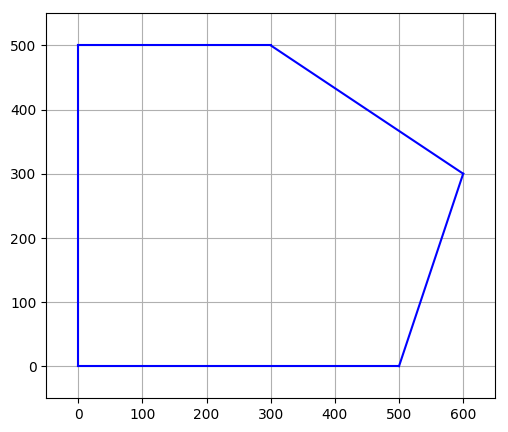

In [44]:
using PyPlot

function plot_site()
    plot([0,0], [0,500], "b-")
    plot([0,500], [0,0], "b-")
    plot([500,600], [0,300],"b-")
    plot([300,600], [500,300],"b-")
    plot([0,300], [500,500],"b-")
    axis("image")
    axis([-.5,6.5,-.5,5.5]*100)
    grid()
end

figure(figsize=(6,5))
plot_site()

**Solution:** This is a problem of finding the Chebychev center of a convex polygon. Our first task is to find the inequalities that determine the region (the A and b matrices). Then, to ensure we respect the 50 foot perimeter constraint, we simply shrink the resulting radius by 50.

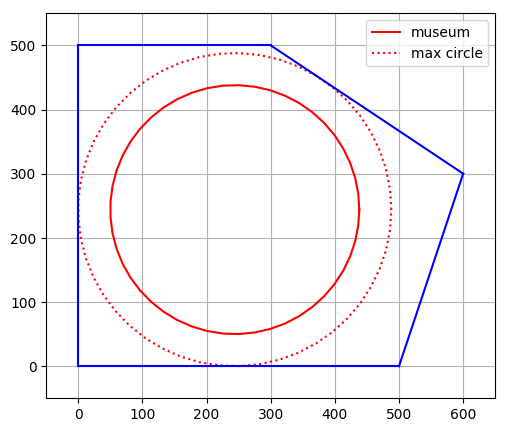

radius of museum is: 194.02852679380186
location of center is: [244.029, 244.029]


In [45]:
using JuMP, Clp

A = [-1 0; 0 -1; 0 1; 2/3 1; 3 -1]
b = [0; 0; 5; 7; 15 ]*100

m = Model(solver=ClpSolver())
@variable(m, r >= 0)
@variable(m, x[1:2])
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + (r+50)*norm(A[i,:]) <= b[i])
end
@objective(m,Max,r)
solve(m)
ropt = getvalue(r)
xopt = getvalue(x)

println("radius of museum is: ", ropt)
println("location of center is: ", xopt)


figure(figsize=(6,5))

θ = linspace(0,2π,50)
plot(xopt[1] + ropt*cos.(θ), xopt[2] + ropt*sin.(θ), "r-")
plot(xopt[1] + (ropt+50)*cos.(θ), xopt[2] + (ropt+50)*sin.(θ), "r:")

plot_site()

legend(["museum", "max circle"]);